In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

!pip install yfinance
import yfinance as yf

start = '2016-01-01'
end = '2026-02-3'

df = yf.download('AAPL', start=start, end=end)

/tmp/ipython-input-56601904.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.753153,23.757663,22.997832,23.135368,270597600
2016-01-05,23.157915,23.865887,23.090275,23.843341,223164000
2016-01-06,22.704729,23.081264,22.517591,22.673164,273829600
2016-01-07,21.746479,22.576205,21.741970,22.249276,324377600
2016-01-08,21.861471,22.346230,21.816378,22.219968,283192000


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2026-01-27,258.269989,261.950012,258.209991,259.170013,49648300
2026-01-28,256.440002,258.859985,254.509995,257.649994,41288000
2026-01-29,258.279999,259.649994,254.410004,258.000000,67253000
2026-01-30,259.480011,261.899994,252.179993,255.169998,92352600
2026-02-02,270.010010,270.489990,259.204987,260.019989,72890096


In [5]:
df= df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2016-01-04,23.753153,23.757663,22.997832,23.135368,270597600
1,2016-01-05,23.157915,23.865887,23.090275,23.843341,223164000
2,2016-01-06,22.704729,23.081264,22.517591,22.673164,273829600
3,2016-01-07,21.746479,22.576205,21.741970,22.249276,324377600
4,2016-01-08,21.861471,22.346230,21.816378,22.219968,283192000


In [6]:
columns_to_drop = ['Date', 'Adj Close']
existing_columns = [col for col in columns_to_drop if col in df.columns]
df = df.drop(existing_columns, axis=1)
df.head()

/tmp/ipython-input-882231944.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(existing_columns, axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,23.753153,23.757663,22.997832,23.135368,270597600
1,23.157915,23.865887,23.090275,23.843341,223164000
2,22.704729,23.081264,22.517591,22.673164,273829600
3,21.746479,22.576205,21.741970,22.249276,324377600
4,21.861471,22.346230,21.816378,22.219968,283192000


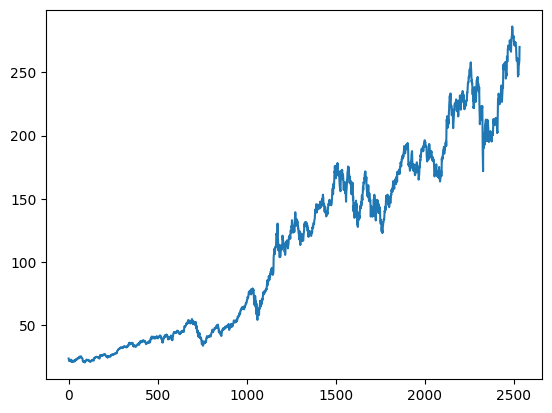

In [7]:

plt.plot(df.Close)

In [8]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,23.753153,23.757663,22.997832,23.135368,270597600
1,23.157915,23.865887,23.090275,23.843341,223164000
2,22.704729,23.081264,22.517591,22.673164,273829600
3,21.746479,22.576205,21.741970,22.249276,324377600
4,21.861471,22.346230,21.816378,22.219968,283192000
...,...,...,...,...,...
2530,258.269989,261.950012,258.209991,259.170013,49648300
2531,256.440002,258.859985,254.509995,257.649994,41288000
2532,258.279999,259.649994,254.410004,258.000000,67253000


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2530,261.722733
2531,261.891655
2532,262.079876
2533,262.298180


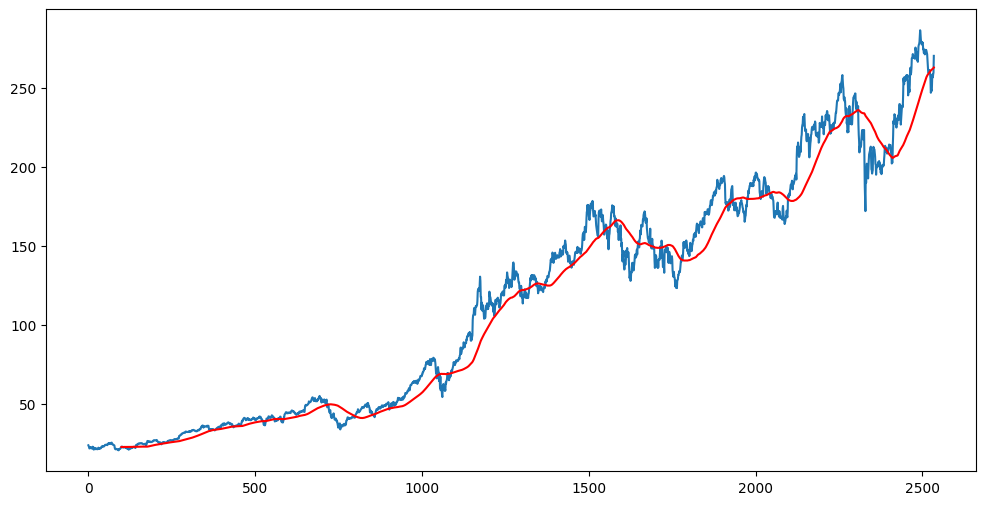

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2530,235.452946
2531,235.786291
2532,236.090317
2533,236.378568


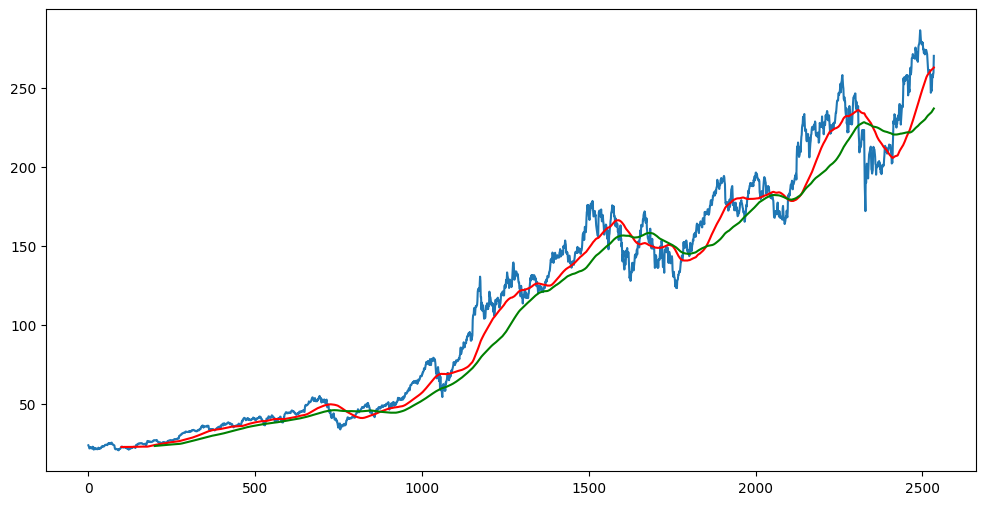

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
df.shape

(2535, 5)

In [14]:
# Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):])

print(data_training.shape)
print(data_testing.shape)

(1774, 1)
(761, 1)


In [15]:
data_training.head()

Ticker,AAPL
0,23.753153
1,23.157915
2,22.704729
3,21.746479
4,21.861471


In [16]:
data_testing.head()

Ticker,AAPL
1774,135.820953
1775,139.012802
1776,140.411728
1777,139.751678
1778,141.820465


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0199731 ],
       [0.0161978 ],
       [0.01332346],
       ...,
       [0.7187054 ],
       [0.7141442 ],
       [0.71451903]])

In [19]:
data_training_array.shape

(1774, 1)

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(1674, 100, 1)

In [22]:
#ML model

In [23]:
!pip install tensorflow
!pip install keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs=25)

Epoch 1/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 0.0550
Epoch 2/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0020
Epoch 3/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 0.0016
Epoch 4/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0017
Epoch 5/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - loss: 0.0017
Epoch 6/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 168ms/step - loss: 0.0015
Epoch 7/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 0.0017
Epoch 8/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0015
Epoch 9/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 0.0015
Epoch 10/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 0.0014
Epoch 11/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 0.0013
Epoch 12/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 0.0016
Epoch 13/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0014
Epoch 14/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 0.0013
Epoch 15/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step

In [30]:
model.save('keras_model.h5')

In [31]:
data_testing.head()

Ticker,AAPL
1774,135.820953
1775,139.012802
1776,140.411728
1777,139.751678
1778,141.820465


In [32]:
data_training.tail(100)

Ticker,AAPL
1674,160.921326
1675,158.718307
1676,156.289017
1677,154.626892
1678,155.354691
...,...
1769,131.427261
1770,132.757202
1771,133.919647
1772,133.200500


In [33]:
past_100_days = data_training.tail(100)

In [34]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [35]:
final_df.head()

Ticker,AAPL
0,160.921326
1,158.718307
2,156.289017
3,154.626892
4,155.354691


In [36]:
input_data= scaler.fit_transform(final_df)
input_data

array([[2.31612791e-01],
       [2.18099668e-01],
       [2.03198609e-01],
       [1.93003280e-01],
       [1.97467533e-01],
       [1.84497174e-01],
       [1.76775122e-01],
       [1.85401874e-01],
       [1.76352817e-01],
       [1.93908167e-01],
       [2.30466519e-01],
       [1.72612717e-01],
       [1.81480572e-01],
       [1.63744488e-01],
       [1.53669617e-01],
       [1.76473649e-01],
       [1.91072767e-01],
       [1.71888658e-01],
       [1.65976567e-01],
       [1.52040858e-01],
       [1.54092016e-01],
       [1.60064570e-01],
       [1.48481492e-01],
       [1.04080724e-01],
       [7.82602771e-02],
       [1.03899616e-01],
       [1.25919219e-01],
       [1.27728899e-01],
       [1.21877178e-01],
       [8.96623399e-02],
       [9.16530352e-02],
       [8.29660077e-02],
       [7.91049818e-02],
       [1.07157321e-01],
       [7.93463661e-02],
       [1.03658418e-01],
       [1.11742313e-01],
       [1.12405909e-01],
       [1.09570509e-01],
       [1.32977581e-01],


In [37]:
input_data.shape

(861, 1)

In [38]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
     x_test.append(input_data[i-100: i])
     y_test.append(input_data[i, 0])


In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(761, 100, 1)
(761,)


In [40]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step


In [41]:
y_predicted.shape

(761, 1)

In [42]:
y_test

array([0.07764928, 0.09722781, 0.1058087 , 0.10176001, 0.11444977,
       0.12635407, 0.10864877, 0.11644383, 0.1233326 , 0.15590301,
       0.17814022, 0.16140178, 0.17904661, 0.16255001, 0.15620523,
       0.15844423, 0.17563213, 0.17169819, 0.1845889 , 0.17478471,
       0.16776453, 0.14313276, 0.14573529, 0.14870069, 0.13242096,
       0.13974374, 0.13665722, 0.12394809, 0.12757933, 0.15856554,
       0.17551111, 0.16201511, 0.16970113, 0.15590254, 0.14325406,
       0.15517642, 0.16800639, 0.17042734, 0.18773597, 0.18259184,
       0.19711645, 0.20849409, 0.1997188 , 0.20637601, 0.21436472,
       0.20244226, 0.19862944, 0.2175117 , 0.22713431, 0.24250616,
       0.25019246, 0.24692436, 0.23560719, 0.24105392, 0.22513735,
       0.21769337, 0.21345702, 0.24650065, 0.24438248, 0.24450359,
       0.25200803, 0.2590284 , 0.2530974 , 0.24323275, 0.24510869,
       0.23566775, 0.23560719, 0.26374891, 0.27143474, 0.2708903 ,
       0.2645355 , 0.25793894, 0.2478928 , 0.29497716, 0.29455

In [43]:
y_predicted

array([[0.06136959],
       [0.06749576],
       [0.07521229],
       [0.08412808],
       [0.09250076],
       [0.10098924],
       [0.10995384],
       [0.11644986],
       [0.12149531],
       [0.12583733],
       [0.1327658 ],
       [0.14307159],
       [0.15272385],
       [0.162806  ],
       [0.17033675],
       [0.17475814],
       [0.17697677],
       [0.17942455],
       [0.18138841],
       [0.18424618],
       [0.18634441],
       [0.18698855],
       [0.18400094],
       [0.17928287],
       [0.17427886],
       [0.16790822],
       [0.16210826],
       [0.15695356],
       [0.15139915],
       [0.14652653],
       [0.14586157],
       [0.14978889],
       [0.15482102],
       [0.1608067 ],
       [0.16526943],
       [0.16691357],
       [0.16784424],
       [0.16961591],
       [0.17203939],
       [0.17650056],
       [0.18126522],
       [0.18727928],
       [0.19468293],
       [0.2012521 ],
       [0.20730704],
       [0.21325693],
       [0.21723664],
       [0.219

In [44]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 4.156524821625472
Root Mean Squared Error (RMSE): 5.653806898908041


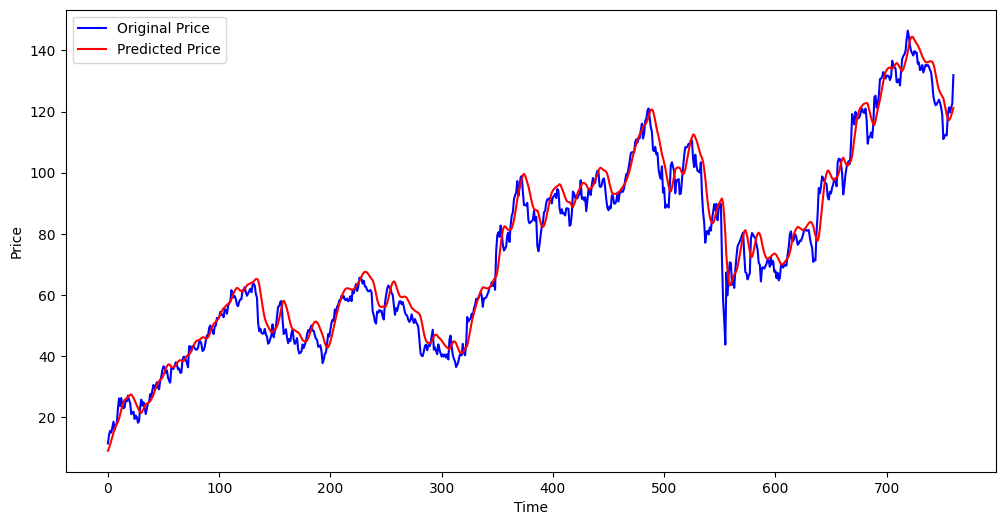

In [46]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.show()